In [1]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [2]:
data=pl.read_csv("./Customer-Churn.csv")
print(data.shape)
data.head()

(7043, 21)


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


## PreSplitting

In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data= train_test_split(data,test_size=0.3,random_state=42,stratify=data[["Churn"]],shuffle=True)  # Holdout set
train_data.shape,test_data.shape

((4930, 21), (2113, 21))

In [4]:
train_data.describe()

statistic,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,str,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""count""","""4930""","""4930""",4930.0,"""4930""","""4930""",4930.0,"""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""","""4930""",4930.0,4923.0,"""4930"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,7.0,"""0"""
"""mean""",null,null,0.161055,null,null,32.471197,null,null,null,null,null,null,null,null,null,null,null,null,64.950081,2305.070485,null
"""std""",null,null,0.367619,null,null,24.64635,null,null,null,null,null,null,null,null,null,null,null,null,30.243674,2292.550954,null
"""min""","""0002-ORFBO""","""Female""",0.0,"""No""","""No""",0.0,"""No""","""No""","""DSL""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""No""","""Bank transfer (automatic)""",18.4,18.85,"""No"""
"""25%""",null,null,0.0,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,35.5,400.0,null
"""50%""",null,null,0.0,null,null,29.0,null,null,null,null,null,null,null,null,null,null,null,null,70.6,1389.2,null
"""75%""",null,null,0.0,null,null,56.0,null,null,null,null,null,null,null,null,null,null,null,null,90.05,3862.55,null
"""max""","""9995-HOTOH""","""Male""",1.0,"""Yes""","""Yes""",72.0,"""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two year""","""Yes""","""Mailed check""",118.75,8684.8,"""Yes"""


# Dealing with null values

In [5]:
train_data.filter((train_data["TotalCharges"].is_null()))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""4075-WKNIU""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Mailed check""",73.35,null,"""No"""
"""3213-VVOLG""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",25.35,null,"""No"""
"""2520-SGTTA""","""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",20.0,null,"""No"""
"""4472-LVYGI""","""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",52.55,null,"""No"""
"""4367-NUYAO""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",25.75,null,"""No"""
"""2775-SEFEE""","""Male""",0,"""No""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""Yes""","""Yes""","""No""","""Yes""","""No""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",61.9,null,"""No"""
"""7644-OMVMY""","""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",19.85,null,"""No"""


Very few observations dropping them ratherthan imputing.Model cant learn with 4 observations during cv

In [6]:
train_data=train_data.filter(~(train_data["TotalCharges"].is_null()))
test_data=test_data.filter(~(test_data["TotalCharges"].is_null()))

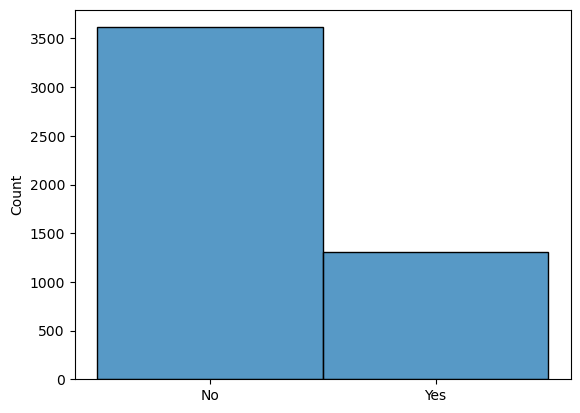

In [8]:
sns.histplot(train_data["Churn"])
plt.show()

Casting yes as 1 and No as 0

In [9]:
train_data=train_data.with_columns(train_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Float64))
test_data=test_data.with_columns(test_data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Float64))

# Ensuring uniques observations

In [10]:
train_data=train_data.unique()
test_data=test_data.unique()

# Imbalanced dataSet

In [11]:
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

# Categorical EDA

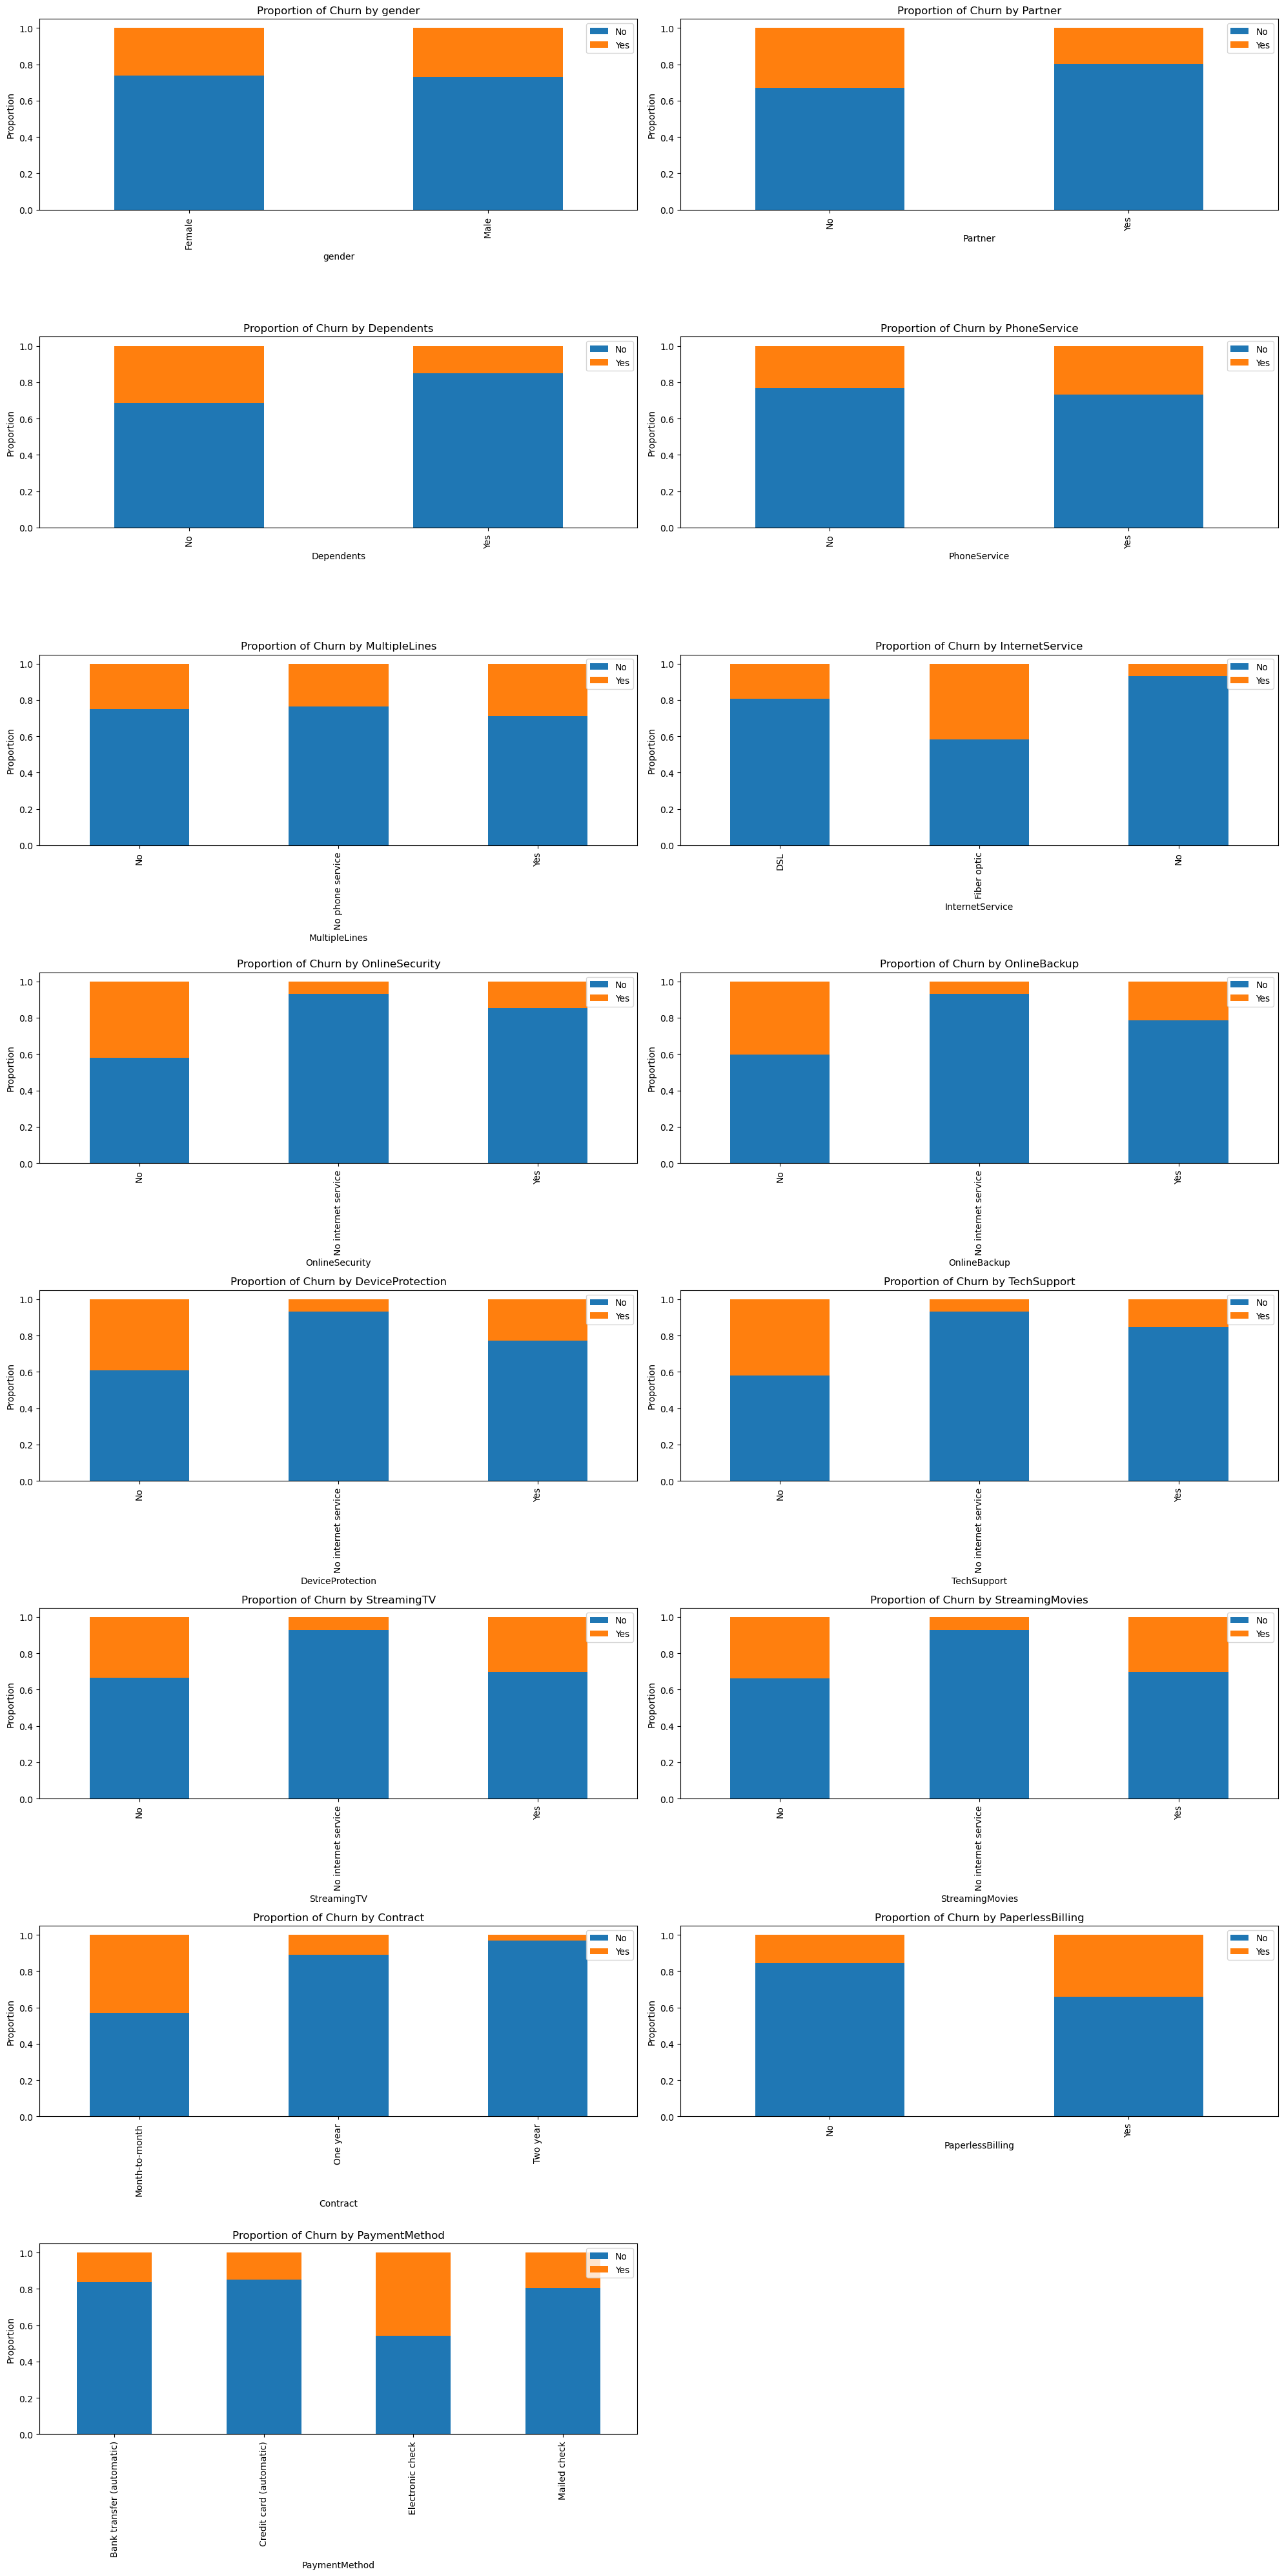

In [12]:
cat_proportion_plot(train_data,cat_cols,"Churn")

More likely to churn
- Having partners,Dependents
- Customers with No (OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport)
- FiberOptic Consumers
- Month-to-Month contracts
- Paperless billing
- Electronic Check payments

In [13]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"Churn")

Kruskal-Wallis H-statistic: 0.13428212838225895 P-value: 0.7140328524092932
There is no significant difference in Churn between different gender categories.

Kruskal-Wallis H-statistic: 110.2864394973179 P-value: 8.4806782328554e-26
There is a significant difference in Churn between different Partner categories.

Kruskal-Wallis H-statistic: 144.0511739802639 P-value: 3.462600814831902e-33
There is a significant difference in Churn between different Dependents categories.

Kruskal-Wallis H-statistic: 2.7714593516094017 P-value: 0.09595863940553152
There is no significant difference in Churn between different PhoneService categories.

Kruskal-Wallis H-statistic: 11.467025690606489 P-value: 0.0032356907647621944
There is a significant difference in Churn between different MultipleLines categories.

Kruskal-Wallis H-statistic: 516.9181588729793 P-value: 5.657805362252884e-113
There is a significant difference in Churn between different InternetService categories.

Kruskal-Wallis H-statisti

# Similar results from hypothesis tests except : it shows few more features are significant:
- Streaming Tv
- Streaming Movies

In [14]:
train_data=train_data.drop("gender","PhoneService")
test_data=test_data.drop("gender","PhoneService")
cat_cols.remove("gender")
cat_cols.remove("PhoneService")

marking count of more churning categories to 1

In [15]:
train_data=train_data.with_columns(train_data['Partner'].str.replace_many(["Yes","No"],["0","1"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['Dependents'].str.replace_many(["Yes","No"],["0","1"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['PaperlessBilling'].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))
train_data=train_data.with_columns(train_data['PaymentMethod'].is_in(["Electronic check"]).cast(pl.Int8))

test_data=test_data.with_columns(test_data['Partner'].str.replace_many(["Yes","No"],["0","1"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['Dependents'].str.replace_many(["Yes","No"],["0","1"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['PaperlessBilling'].str.replace_many(["Yes","No"],["1","0"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['Contract'].str.replace_many(["Month-to-month","One year","Two year"],["1","12","24"]).cast(pl.Int8))
test_data=test_data.with_columns(test_data['PaymentMethod'].is_in(["Electronic check"]).cast(pl.Int8))


cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
modified_cols = ['Partner','Dependents','PaperlessBilling','Contract','PaymentMethod']

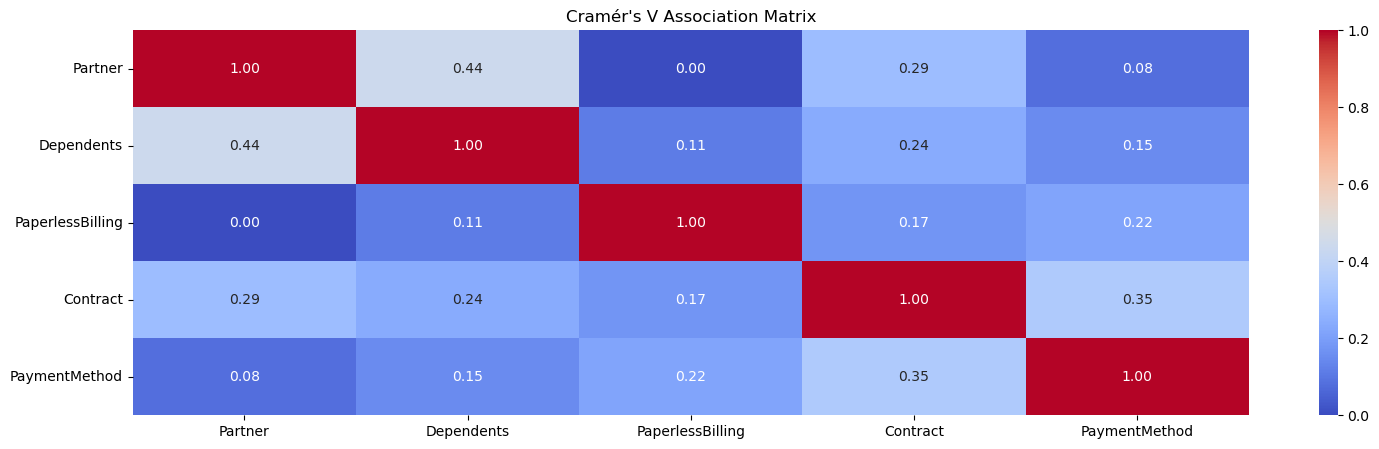

In [16]:
plot_heatmap(cramers_v_matrix(train_data,cat_cols=modified_cols),columns=modified_cols)

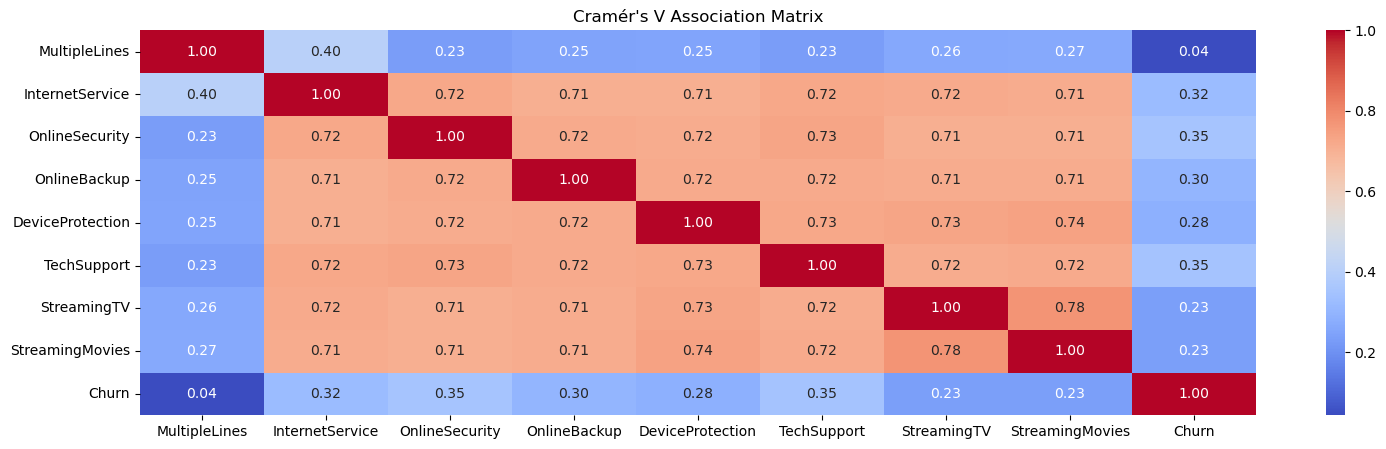

In [17]:
matrix = cramers_v_matrix(train_data,cat_cols+["Churn"])
plot_heatmap(matrix,cat_cols+["Churn"])


Seems many Associated features, we can deal with this in feature engineering

# Numerical EDA

## Univariate Analysis

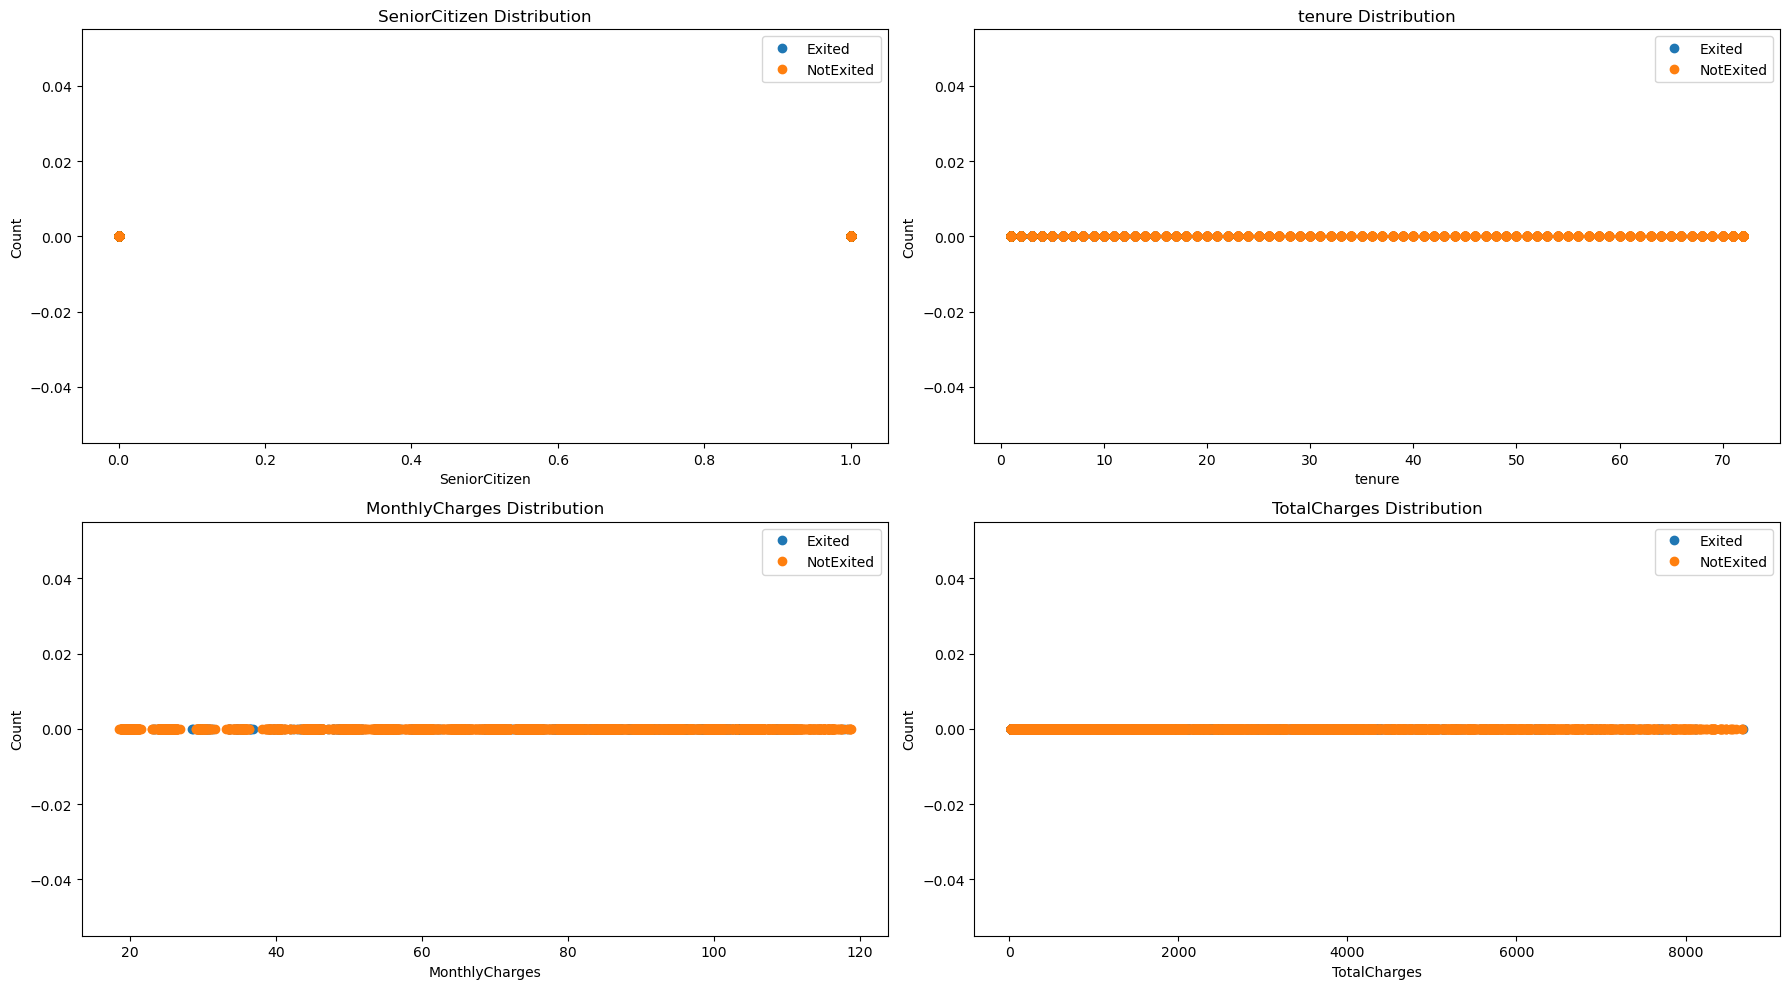

In [18]:
df_Churn = train_data.filter(train_data['Churn']==1)
df_notChurn = train_data.filter(train_data['Churn']==0)
univariavte_lineplots(df_Churn, df_notChurn, num_cols)

Data is not liner separable by single feature

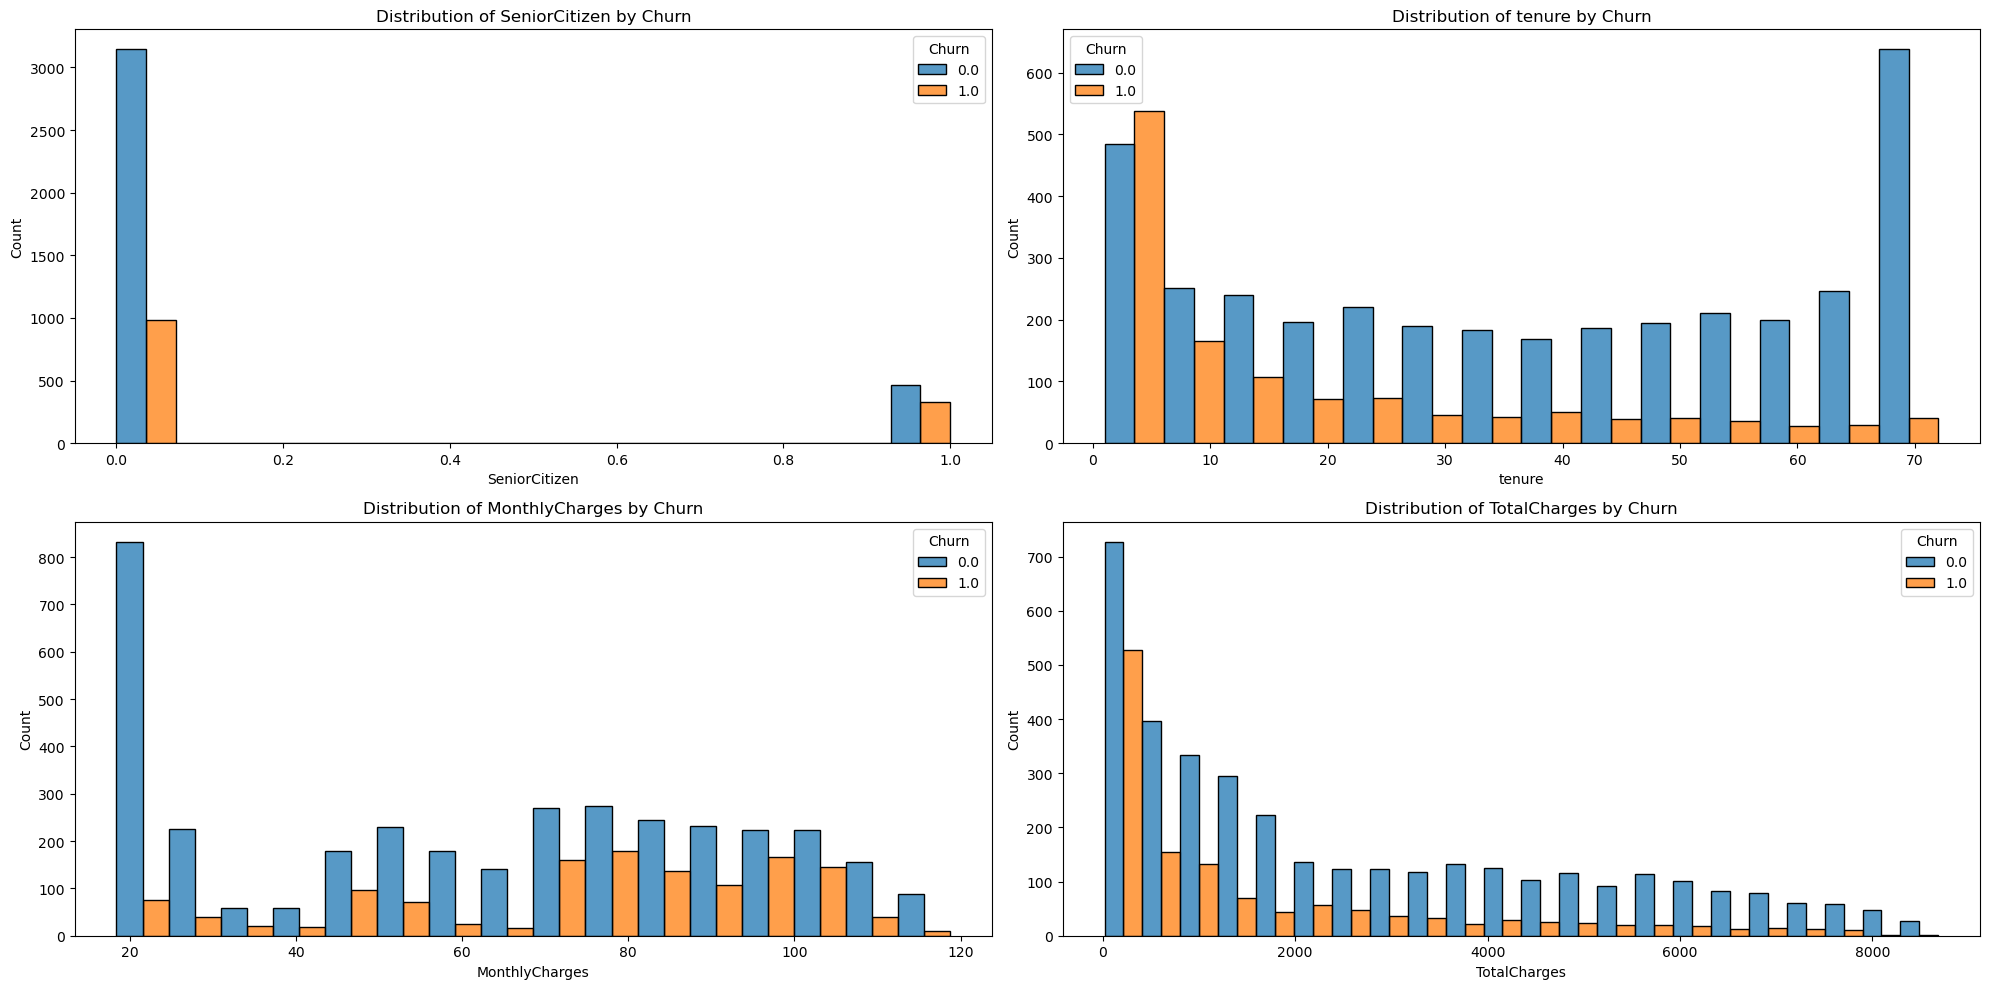

In [19]:
num_dodge_plot(train_data,num_cols,"Churn")

## Bivariate Analysis

<Axes: >

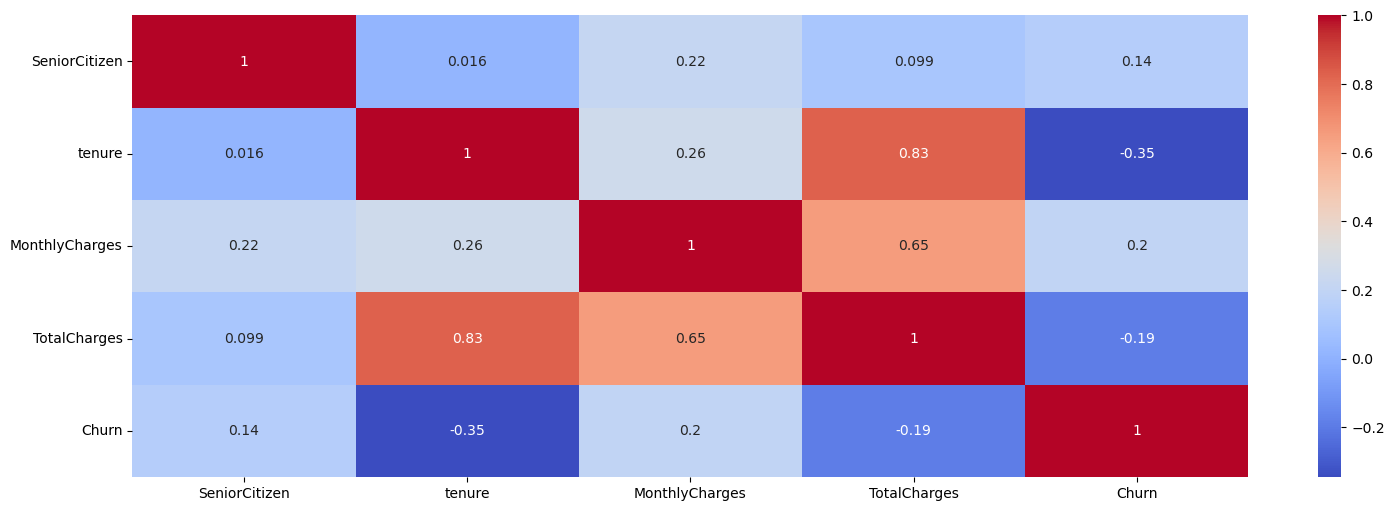

In [20]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols+["Churn"]].to_pandas().corr(),annot=True,cmap="coolwarm")

# Multivariate Analysis

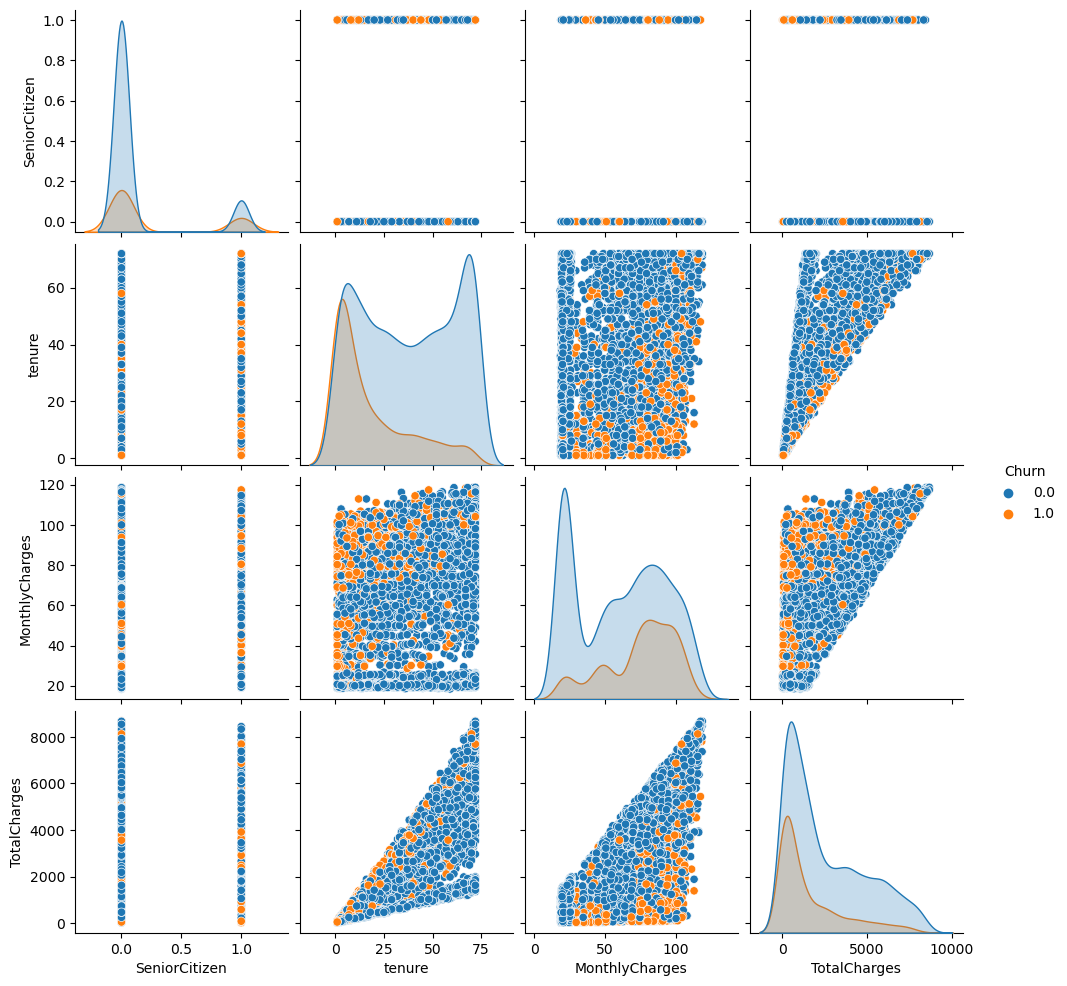

In [21]:
sns.pairplot(train_data[num_cols+["Churn"]].to_pandas(),hue='Churn')

In [22]:
train_data.write_csv("../Day2_Naive_Modeling/train_data.csv")
test_data.write_csv("../Day2_Naive_Modeling/test_data.csv")
train_data.write_csv("../Day3_FeatureEngineering/train_data.csv")
test_data.write_csv("../Day3_FeatureEngineering/test_data.csv")

Base model

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
 
cat_cols=[col for col in train_data.drop("customerID").columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

X_train=train_data.drop("customerID","Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("customerID","Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("tranformer", transformer),
        ("classifier", LogisticRegression(penalty=None)),
    ]
)
pipe

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies']),
                                                 ('scaler', StandardScaler(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression(penalty=None))])

In [24]:
from sklearn.model_selection import cross_validate,RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=10,random_state=42)

cv_results = cross_validate(pipe, X_train,y_train, cv=rskf, scoring=['recall','roc_auc'],n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train roc auc Score: {cv_results["train_roc_auc"].mean()}')
print(f'Standard Deviation of Train roc auc Scores: {cv_results["train_roc_auc"].std()}')
print(f'Mean Train recall Score: {cv_results["train_recall"].mean()}')
print(f'Standard Deviation of Train recall Scores: {cv_results["train_recall"].std()}\n')

print(f'Mean Test roc auc Score: {cv_results["test_roc_auc"].mean()}')
print(f'Standard Deviation of Test roc auc Scores: {cv_results["test_roc_auc"].std()}')
print(f'Mean Test recall Score: {cv_results["test_recall"].mean()}')
print(f'Standard Deviation of Test recall Scores: {cv_results["test_recall"].std()}')

Mean Train roc auc Score: 0.8489479620887239
Standard Deviation of Train roc auc Scores: 0.002100522076812685
Mean Train recall Score: 0.5518856103038862
Standard Deviation of Train recall Scores: 0.005687674444217424

Mean Test roc auc Score: 0.8457433662799028
Standard Deviation of Test roc auc Scores: 0.019010274550924272
Mean Test recall Score: 0.548099823840282
Standard Deviation of Test recall Scores: 0.042914959573255994


In [25]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
predictions= cross_val_predict(pipe,X_test,y_test)
print("logistic regression accuracy :",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic regression accuracy : 0.8003793266951161
auc roc 0.7191097016678412
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1548
         1.0       0.65      0.55      0.59       561

    accuracy                           0.80      2109
   macro avg       0.75      0.72      0.73      2109
weighted avg       0.79      0.80      0.79      2109



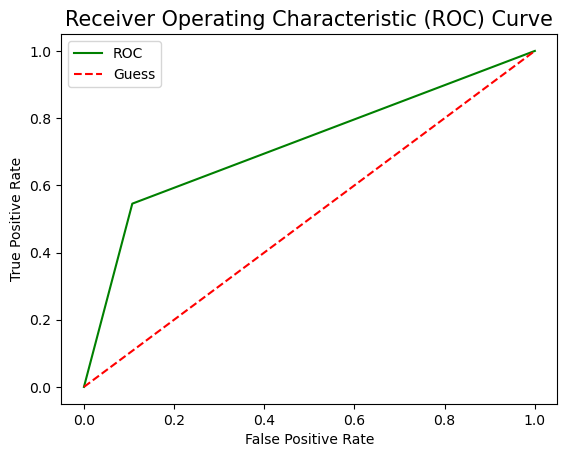

In [26]:
fpr, tpr, thresholds=roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

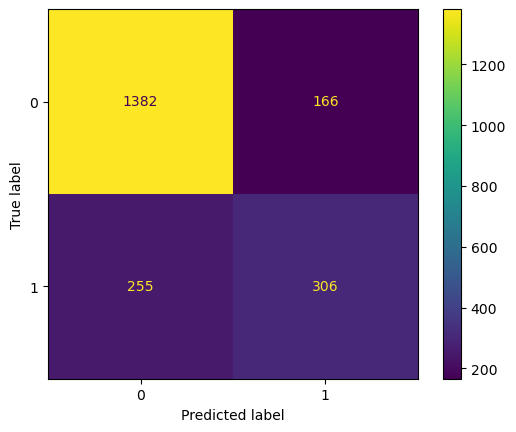

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions))
fig.plot()

In [28]:
from sklearn.metrics import roc_auc_score,f1_score,precision_score,accuracy_score,recall_score,matthews_corrcoef
# Evaluation
roc_auc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test,predictions)
precision = precision_score(y_test,predictions)
coef = matthews_corrcoef(y_test,predictions)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"\033[1mRecall score: {recall:.2f}\033[0m")
print(f"precision : {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Corr : {coef}")

ROC AUC: 0.72
F1 Score: 0.59
Recall score: 0.55
precision : 0.65
Accuracy: 0.80
Corr : 0.46458284906711894


In [203]:
roc_auc,f1,recall

(0.7256715582638976, 0.602502406159769, 0.5579322638146168)

56% churners are identified with 66% 